### INF 510 Fall 2019 Final Project Submission

1.	**The name of student**:

    Yusong Cheng (only one)

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    You can get the clean data used in this notebook analysis simply from data subfolder where the data sets have existed already,
    
    or you can run the cheng_yusong_hw_5.py file to get the data sets from Internet.
    
    To do so, using command-line: python src/cheng_yusong_hw_5 source=remote 
    
    ,then datasets will be stored in data subfolder
    
    This project requires the following packages:
    - pandas, numpy, seaborn, requests and beautifulsoup
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/yusongcheng/INF510-finalproject and execute this notebook


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The first should be it takes more than 10 minutes to scrape datasets from websites.
    
    Secondly, I think the integrated information table can be displayed in the form of scatter plots, so that each point's label can provide a variety of information, such as the restaurant's address, price, rating, weather, etc. But because there are too many points, and there are many labels for each point, I have no good way to display it. All I can do is display a table, and this could be improved visually by a certain way.


4.  **Anything else you feel is relevant to the grading of your project your project.**

    The structure of my project is not very clear. I think I should summarize what I've done.
    My data is about restaurant prices, scores, taxes and weather. So I thought they were more or less related. However, I did a regression analysis and found that they were almost completely unrelated. This made me think that the research seemed to fail, so I did some statistical analysis on restaurants later. And I aggregated all the information so that it can help those looking for the ideal restaurant for dinner.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

   As I mentioned in the last question. The point of my project is to figure out whether there is a relationship between restaurants price, scores, tax and weather condition in corresponding zipcode area. But after I did some regression analysis on the data sets, I found each one does not correlate the others. 

   Then, I wanted to know the percentage of restaurants in each price and scores level.

   Also, I wanted to know what the average weather condition and tax are in these price and score level.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

   My original assumption was there is at least one or two significant positive or negative correlation between these attributes of restaurants. 
   
   At least I used to think that restaurants with higher price levels would be definitely scored higher, and the average price level should be higher in the area with higher tax. But it seemed I was wrong.
   
   As the results showed, the R^2 of them are:
   
   price and scores : -0.1635382777268607
   
   tax and scores : 0.08513519185920122
   
   weather suitability and price : -0.046926757767768966
   
   weather suitability and scores : 0.02464296647255796
   
   So, the conclusion is that there is no significant positive or negative correlation at all due to the low R^2
   
   Then I did the statistical analysis of price and scores and conclude:
   
   1. Almost half of the restaurants in LA county are level 2 regarding price
   
   2. Most scores of the restaurants fall into the range from3.0 to 4.0
   
   Few of them are scored highly or lowly.
   
   You can see the pie charts below.
   
   Finally, the average tax and weather condition of each price and scores level are similar.
   
   You can see the bar charts below.

7. **What difficulties did you have in completing the project?**  

    The most difficult part must be scrape the restaurant information data from Tableagent website, because the structure of the web page is complicated. I failed many times and I needed to wait for awhile every time.
    

8. **What skills did you wish you had while you were doing the project?**

   In this project, the skill I would most like to have is to visualize the last information I collected, including weather, tax and restaurant information for each postal code area. 
   
   I mean, I want to show this data through a map. For example, they are displayed on the map according to the location of each restaurant, and each point can display the data I collected.


9. **What would you do “next” to expand or augment the project?**

    If I can make what I mentioned in question 8,
    
    I can completely visualize my data. In this way, I will be able to spatially show you the popular restaurants in LA county, the tax of the area where they are located, the current weather, etc. 
    
    And I can even include more data set like the average hotel price, density of tourism attractions, etc so that this map can help those who are looking for restaurants or travel in LA county by providing sufficient information.

In [13]:
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Read in the three data sets

res_info = pd.read_csv('data/restaurant_info.csv')
tax_info = pd.read_csv('data/tax_info.csv')
weather_info = pd.read_csv('data/weather_info.csv')

In [ ]:
#Take a look of the columns

In [15]:
res_info.head()

,res_name,res_streetaddress,res_locality,zipcode,res_price,res_stars
0,Polo Lounge,9641 Sunset Boulevard,Beverly Hills,90210,2,3.0
1,Amici,469 N. Doheny Drive,Beverly Hills,90210,2,3.5
2,La Scala,434 North Canon Drive,Beverly Hills,90210,2,4.0
3,Da Pasquale,9749 Santa Monica Boulevard,Beverly Hills,90210,2,3.5
4,Matsuhisa,129 North La Cienega Blvd.,Beverly Hills,90211,4,4.0


In [18]:
#add a new column
temp = []
for each in tax_info['tax']:
    temp.append(float(each.strip('[').strip(']').strip("'").split()[0].strip('%'))/100)
tax_info['combine-tax']=temp
tax_info.head()

,zipcode,tax,combine-tax
0,95220,"['7.75% (Combined)', '6% (State)', '0.25% (Cou...",0.0775
1,93510,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.0950
2,92301,"['7.75% (Combined)', '6% (State)', '0.25% (Cou...",0.0775
3,96006,"['7.25% (Combined)', '6% (State)', '0.25% (Cou...",0.0725
4,91301,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.0950


In [17]:
weather_info.head()

,zipcode,weather,temperature,pressure,humidity,visibility,wind_speed,clouds
0,90057,Clouds,284.60,1021,87,16093,0.37,90
1,91104,Clear,284.53,1021,62,16093,0.49,1
2,92236,Clear,281.80,1020,81,16093,2.60,1
3,90291,Mist,284.82,1021,93,2414,1.50,40
4,90804,Rain,284.59,1021,87,16093,0.49,90


In [19]:
#The first data set contains information of many restaurants in LA county 
#like price level, stars(or scores), location and so on

#Get the average price level and stars(or scores) for each zip code.
mean_price_stars_per_zipcode = res_info.groupby(res_info['zipcode']).mean()
mean_price_stars_per_zipcode.reset_index(inplace=True)

In [20]:
mean_price_stars_per_zipcode.head()

,zipcode,res_price,res_stars
0,90005,2.0,3.50
1,90006,2.0,3.00
2,90007,1.5,3.25
3,90010,2.0,3.50
4,90012,2.4,3.50


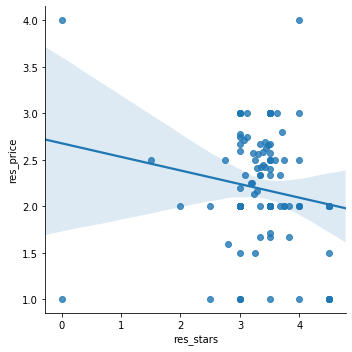

In [21]:
#Trying to figure out whether the price correlates the scores
#Get the regression line
sns.lmplot(x='res_stars', y='res_price', data=mean_price_stars_per_zipcode, fit_reg=True)

In [93]:
#It seems there is no significantly negative or positive relationship at all, let's get the R^2 then.

In [22]:
# Get the R squared value
mean_price_stars_per_zipcode['res_price'].corr(mean_price_stars_per_zipcode['res_stars'])

-0.1635382777268607

In [94]:
# We can conclude that price and scores of restaurants in LA county has a slight negative relationship.
# R squared value is very low, which can be considered no relationship.

# Then, I want to figure out whether the tax influence the price of restaurants...if there is a relationship...

In [23]:
#Join the second data set of tax information with restaurant table
res_tax = pd.merge(mean_price_stars_per_zipcode, tax_info, how='left', on='zipcode')
#Take a look
res_tax.head()

,zipcode,res_price,res_stars,tax,combine-tax
0,90005,2.0,3.50,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095
1,90006,2.0,3.00,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095
2,90007,1.5,3.25,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095
3,90010,2.0,3.50,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095
4,90012,2.4,3.50,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095


In [ ]:
#Similarly, I will get the regression line and R^2.

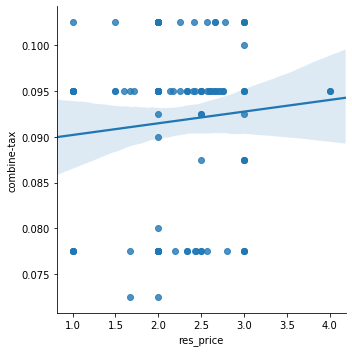

In [24]:
sns.lmplot(x='res_price', y='combine-tax', data=res_tax, fit_reg=True)

In [25]:
# Get the R squared value
res_tax['res_price'].corr(res_tax['combine-tax'])

0.08513519185920122

In [26]:
# So, the result is tax cannot influence the price level of restaurants at all,
# Because R^2 is so low, which means there is no relationship...

# But I guess perhaps weather could influce the price or scores of restaurant...
# Take a look of the weather data
weather_info[['zipcode','humidity','wind_speed']].head()

,zipcode,humidity,wind_speed
0,90057,87,0.37
1,91104,62,0.49
2,92236,81,2.60
3,90291,93,1.50
4,90804,87,0.49


In [27]:
# Before doing the analysis, I need to add a suitability column into weather dataframe 
# based on wind speed and humidity
# It is considered the most comfortable situation when the wind speed is 2 and the humidity is 40.
# That situation is scored 100 and deviation cause point lost.
suitability = []
for row in weather_info.itertuples():
    wind_lost = np.abs(float(row[7]) - 2)
    humidity_lost = np.abs(float(row[5]) - 40)
    suitability.append(100 - wind_lost - humidity_lost)
weather_info['suitability'] = suitability
weather_info.head()

,zipcode,weather,temperature,pressure,humidity,visibility,wind_speed,clouds,suitability
0,90057,Clouds,284.60,1021,87,16093,0.37,90,51.37
1,91104,Clear,284.53,1021,62,16093,0.49,1,76.49
2,92236,Clear,281.80,1020,81,16093,2.60,1,58.40
3,90291,Mist,284.82,1021,93,2414,1.50,40,46.50
4,90804,Rain,284.59,1021,87,16093,0.49,90,51.49


In [28]:
#Join the weather suitability dataframe with restaurants
res_weather = pd.merge(mean_price_stars_per_zipcode, weather_info, how='left', on='zipcode')
res_weather[['zipcode','res_price','res_stars','suitability']].head()
#take a look of the columns

,zipcode,res_price,res_stars,suitability
0,90005,2.0,3.50,46.50
1,90006,2.0,3.00,46.50
2,90007,1.5,3.25,76.37
3,90010,2.0,3.50,51.37
4,90012,2.4,3.50,76.49


-0.06952810392938515

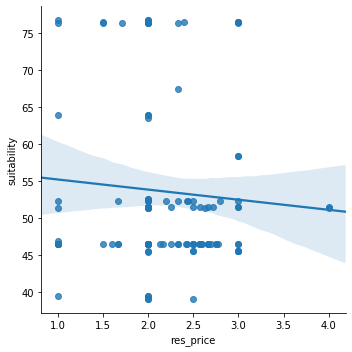

In [29]:
#Let's figure out the relationship between weather suitability and price
sns.lmplot(x='res_price', y='suitability', data=res_weather, fit_reg=True)
res_weather['res_price'].corr(res_weather['suitability'])

0.19121576329853507

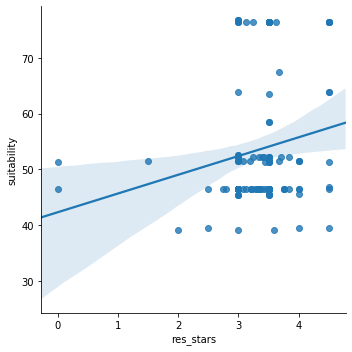

In [30]:
#Seems there is not correlation either...
#How about with scores?
sns.lmplot(x='res_stars', y='suitability', data=res_weather, fit_reg=True)
res_weather['res_stars'].corr(res_weather['suitability'])

In [ ]:
# R^2 is lower..
# So far, based on previous analysis, the price and scores of restaurants in LA are not autocorrelated
# Also, they are not related to tax or weather.
# That means in LA county...
# There is no evidence that restaurants with higher price levels must provide a better experience.
# It cannot be assumed that the price will increase if the consumption tax becomes higher.
# The weather will not influence how guests score the restaurants or how restaurants set the price.

# Above is the conclusion of this analysis so far
# It seems everything in my project has no relationship with each other...
# But maybe I can provide some information when you are finding a restaurant for dinner in LA county...
# So, I decide to aggregate the data sets

In [31]:
final_data = pd.merge(res_info, tax_info, how='left', on='zipcode')
final_data = pd.merge(final_data, weather_info, how='left', on='zipcode')
final_data.head()
#take a loof of the columns

,res_name,res_streetaddress,res_locality,zipcode,res_price,res_stars,tax,combine-tax,weather,temperature,pressure,humidity,visibility,wind_speed,clouds,suitability
0,Polo Lounge,9641 Sunset Boulevard,Beverly Hills,90210,2,3.0,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095,Mist,284.74,1021,93,2414,1.5,40,46.5
1,Amici,469 N. Doheny Drive,Beverly Hills,90210,2,3.5,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095,Mist,284.74,1021,93,2414,1.5,40,46.5
2,La Scala,434 North Canon Drive,Beverly Hills,90210,2,4.0,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095,Mist,284.74,1021,93,2414,1.5,40,46.5
3,Da Pasquale,9749 Santa Monica Boulevard,Beverly Hills,90210,2,3.5,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095,Mist,284.74,1021,93,2414,1.5,40,46.5
4,Matsuhisa,129 North La Cienega Blvd.,Beverly Hills,90211,4,4.0,"['9.5% (Combined)', '6% (State)', '0.25% (Coun...",0.095,Mist,284.72,1021,93,2414,1.5,40,46.5


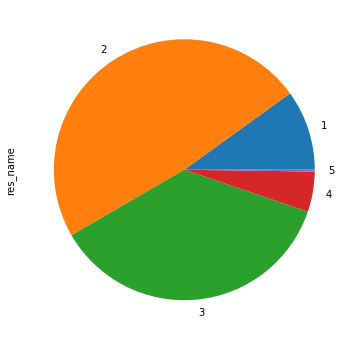

In [32]:
#Let's do some statistical analysis
# Take a loof of the pie chart based on price level
price_pie = final_data['res_name'].groupby(final_data['res_price']).count().plot(kind='pie',figsize=(6,6))

In [ ]:
Almost half of the restaurants in LA county are level 2 regarding price

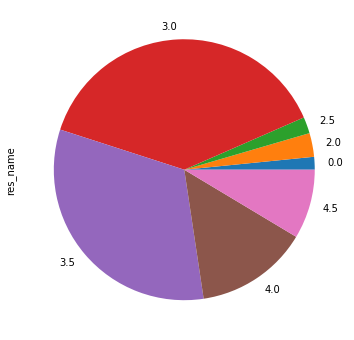

In [33]:
# Take a took of the pie chart based on scores
price_pie = final_data.groupby(final_data['res_stars'])['res_name'].count().plot(kind='pie',figsize=(6,6))

In [ ]:
Most scores of the restaurants fall into the range from3.0 to 4.0.
Few of them are scored highly or lowly.

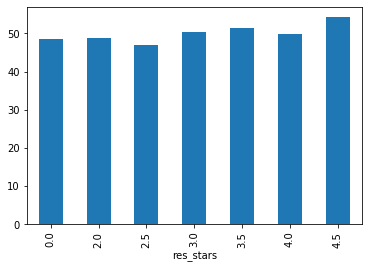

In [34]:
#Take a look of the average weather suitability/tax of restaurants with different price/scores level
#There shall be four bar chart totally
weather_bar = final_data.groupby(final_data['res_stars'])['suitability'].mean().plot(kind='bar')

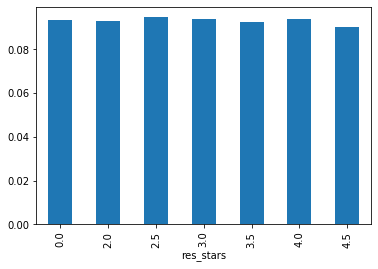

In [35]:
weather_bar = final_data.groupby(final_data['res_stars'])['combine-tax'].mean().plot(kind='bar')

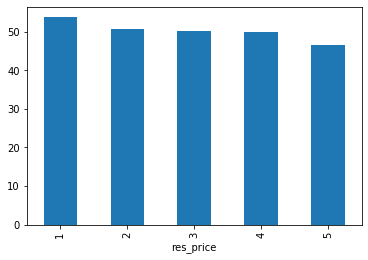

In [36]:
weather_bar = final_data.groupby(final_data['res_price'])['suitability'].mean().plot(kind='bar')

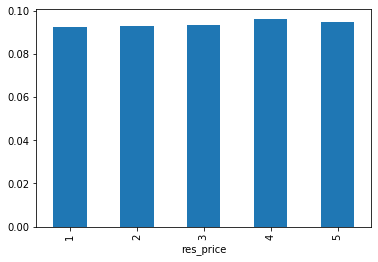

In [37]:
weather_bar = final_data.groupby(final_data['res_price'])['combine-tax'].mean().plot(kind='bar')

In [ ]:
So, now I find the reason why weather and tax dont influence the price of scores of restaurants.
According to the figure, 
the average level of weather suitability and taxes at different levels of price and score are similar.
So the change in these two factors is a slight change relative to the price and the score.
That makes sense, because the change of tax and weather over space within a county cannot be very significant.
But this project used data to confirm this point.